In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm
import scipy.stats as st


import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [522]:
df= sns.load_dataset("mpg")
mpg_mean = np.mean(df['mpg'])
df.mpg.count()

398

# Statistics

## Mean

$$ A = \dfrac1 n \sum \limits _{i=0} ^n a_{i} = \dfrac {a_{1} + a_{2} + ..... + a_{n}} n $$


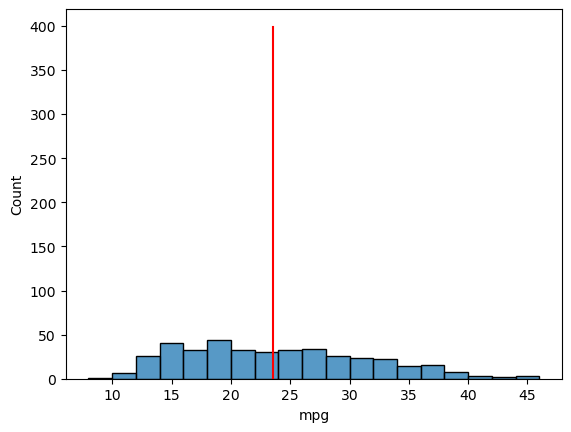

In [4]:
sns.histplot(x=df['mpg'],data=df,bins =[i for i in range(8,47,2)])
plt.plot([mpg_mean for i in range(0,400)],[i for i in range(0,400)], c="red")
plt.show()

## Median

$$
\text{Med}(X) =
\begin{cases}
X_{\frac{n-1}{2}} & \text{if } n \text{ is odd} \\
\frac{X_{\frac{n}{2}} + X_{\frac{n}{2} + 1}}{2} & \text{if } n \text{ is even}
\end{cases}
$$

X = ordered list of values in data set

n =	number of values in data set


In [6]:
mpg_median = np.median(df.mpg)
mpg_median

23.0

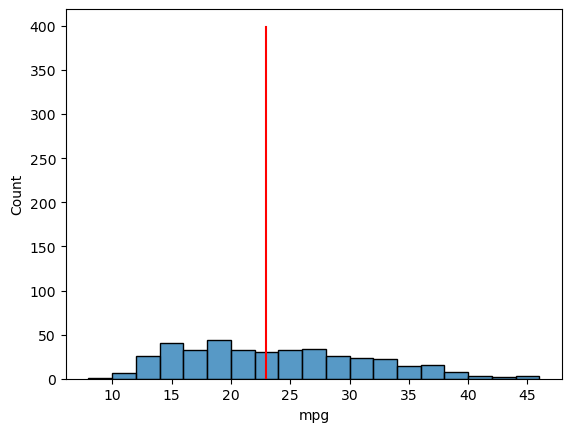

In [7]:
sns.histplot(x=df['mpg'],data=df,bins =[i for i in range(8,47,2)])
plt.plot([mpg_median for i in range(0,400)],[i for i in range(0,400)], c="red")
plt.show()

## Mode

$$ $$

In [9]:
hp_mode = df.horsepower.mode()[0]
hp_mode

150.0

In [10]:
df.horsepower.value_counts()
df.horsepower.min()

46.0

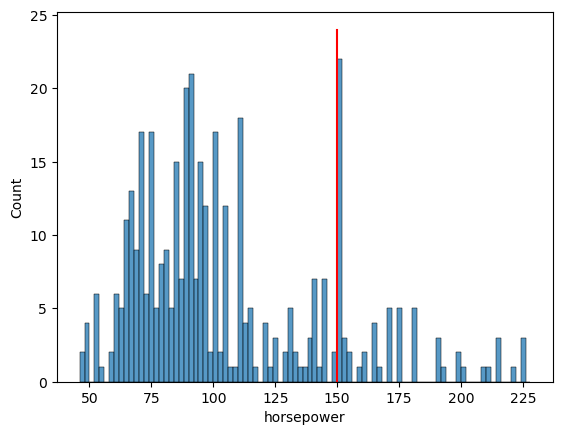

In [11]:
sns.histplot(x=df['horsepower'],data=df,bins =[i for i in range(46,230,2)])
plt.plot([hp_mode for i in range(0,25)],[i for i in range(0,25)], c="red")
plt.show()

## Range

In [13]:
min_hp = df.horsepower.min()
max_hp = df.horsepower.max()
print(f"Minimum HP: {min_hp}, Maximum HP: {max_hp}")

Minimum HP: 46.0, Maximum HP: 230.0


In [14]:
hp_r = max_hp - min_hp 
print(f"Range of horsepower: {hp_r}")

Range of horsepower: 184.0


## Mean Absolute Deviation

$$ \dfrac1 n \sum \limits _{i=1} ^n \mid x_i - m(X) \mid$$


Mean absolute deviation or average absolute deviation, When the data is too spread out, MAD comes into play. MAD is used to determine which data is best to fit a model as it asses the spreadness of the data. The data with the lowest MAD wins!

In [17]:
arr_a = np.random.randint(10,100,10)
arr_b = np.random.randint(10,100,10)
num = np.array([1,2,3,4,5,6,7,8,9,10])

In [18]:
arr_a_mean = np.mean(arr_a)
arr_a_mean

57.9

In [19]:
arr_b_mean = np.mean(arr_b)
arr_b_mean

53.1

In [20]:
mad_a = np.sum(np.abs(arr_a - arr_a_mean)) / len(arr_a)
mad_b = np.sum(np.abs(arr_b - arr_b_mean)) / len(arr_b)
mad_a, mad_b

(19.1, 23.5)

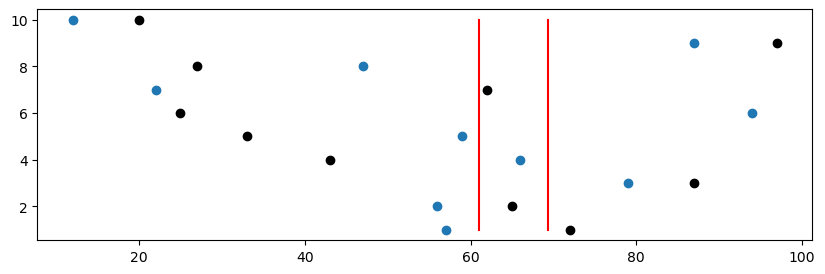

In [21]:
plt.figure(figsize=(10,3))
plt.scatter(arr_a, num)
plt.scatter(arr_b, num, c='black')
plt.plot([69.4,69.4,69.4,69.4,69.4,69.4,69.4,69.4,69.4,69.4], num, c = 'red')
plt.plot([61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,], num, c = 'red')
plt.show()


## Standard Deviation

$$ \sigma = \sqrt \frac{{\sum(x_i - u)^2 }} {N} $$


In [23]:
np.std(df.horsepower)

38.442032714425984

## Variance


$$ S^2 = \frac{{\sum(x_i - \bar{x})^2 }} {n-1} $$

In [25]:
np.var(df.horsepower)

1477.7898792169979

In [26]:
(np.std(df.horsepower))**2

1477.7898792169976

## Percentiles

In [28]:
np.percentile(df['mpg'],0)

9.0

In [29]:
df.mpg.min()

9.0

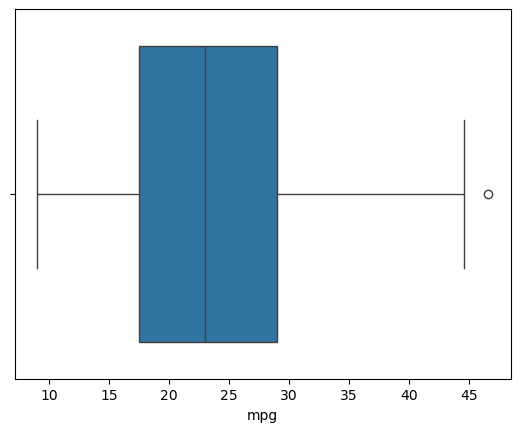

In [30]:
sns.boxplot(x=df.mpg, data=df)
plt.show()

## Skewness


If the data is positively skewed, the tail is longer on the right side and if the data is negatively skewed the tail is longer on the left side.

In [32]:
df.horsepower.skew()

1.0873262824048695

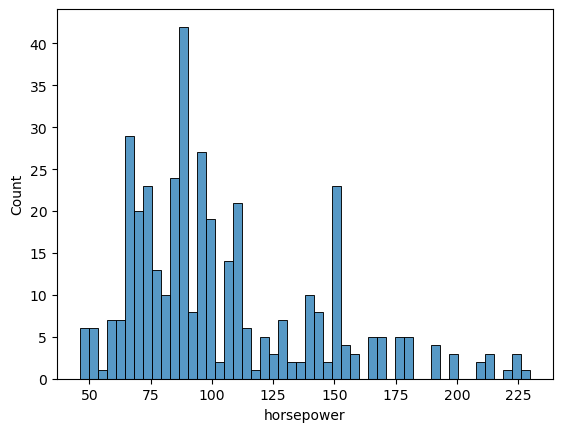

In [33]:
sns.histplot(df.horsepower,bins=50)
plt.show()

## Probability Distribution Function (p.d.f)

PDF for continuous variables and PMF for discrete

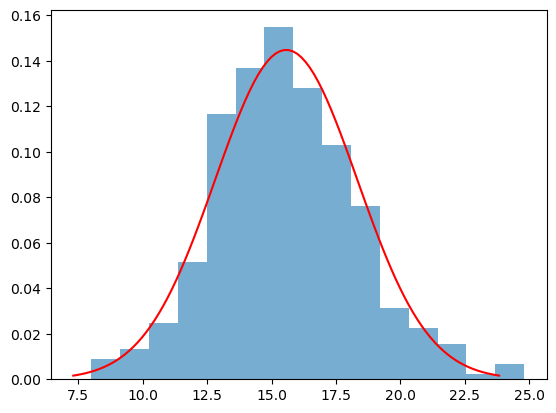

15.568090452261307 2.7542223175940177


In [35]:
mu = np.mean(df['acceleration'])
sigma = np.std(df['acceleration'])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x,mu,sigma)
plt.hist(df['acceleration'],bins=15,density=True,alpha=0.6,label='Histogram')
plt.plot(x,y,'r-')
plt.show()
print(mu,sigma)

## Covariance

$$ Cov(x,y) =   \frac{ \sum (x_i - \bar x) .  (y_i - \bar y)}  {N}$$


If x increases and y increases then there is a positive covariance,
if x decreases and y increases then there is a negative covariance,
if x increases/decreases and there is no change in y then there is 0 covariance.

The range of covariance is between: $$ (-\infty , +\infty) $$


In [37]:
cov_acc_mpg = np.cov(df['acceleration'],df['mpg'])
cov_acc_mpg

array([[ 7.60484823,  9.05892966],
       [ 9.05892966, 61.08961077]])

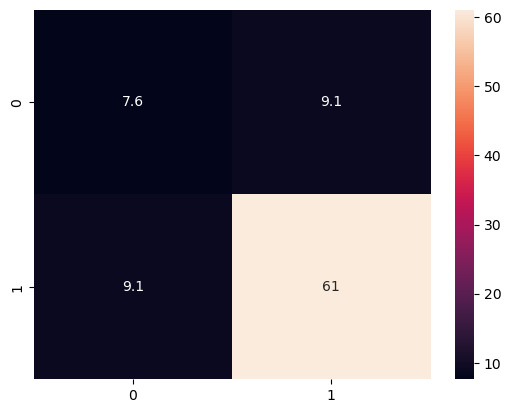

In [38]:
sns.heatmap(cov_acc_mpg,annot=True)
plt.show()

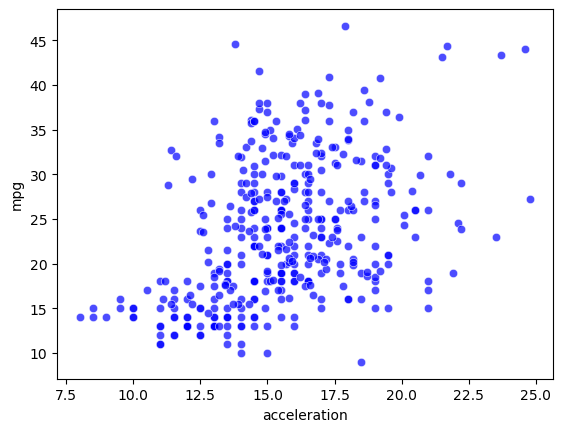

In [39]:
sns.scatterplot(x=df['acceleration'],y=df['mpg'],alpha=0.7,color='blue')
plt.show()

## Correlation

$$ Correlation = \frac {Cov(x,y)}  {\sigma x . \sigma y} $$

The range of correlation is between: 

$$ (-1, 1) $$

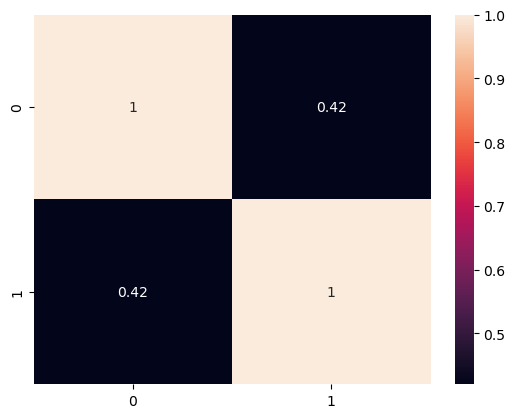

In [41]:
std_x = np.sqrt(cov_acc_mpg[0,0]) 
std_y = np.sqrt(cov_acc_mpg[1,1])
corr = [cov_acc_mpg[0,1] / (std_x * std_y)]
a = np.corrcoef(df['acceleration'],df['mpg'])
sns.heatmap(a,annot=True)
plt.show()

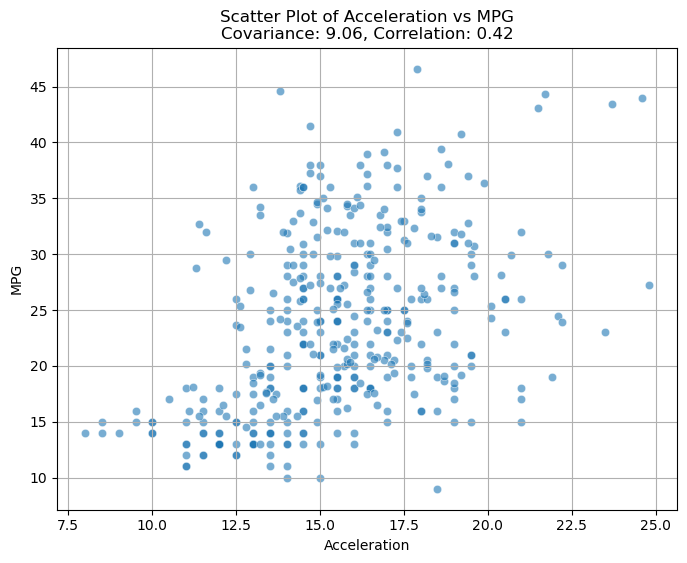

In [42]:
cov_acc_mpg = np.cov(df['acceleration'], df['mpg'])[0, 1]
std_x = np.std(df['acceleration'])
std_y = np.std(df['mpg'])
corr = cov_acc_mpg / (std_x * std_y)  

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['acceleration'], y=df['mpg'], alpha=0.6)
plt.title(f'Scatter Plot of Acceleration vs MPG\nCovariance: {cov_acc_mpg:.2f}, Correlation: {corr:.2f}')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

## Central Limit Theorem

If you take samples from a population data, then the mean of those samples will be equal to the population mean

In [44]:
clt_data = [np.random.randint(10,100) for i in range(10000)]
clt_data = pd.DataFrame({"population": clt_data})

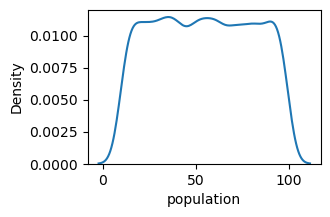

In [45]:
plt.figure(figsize=(3,2))
sns.kdeplot(x="population", data=clt_data)
plt.show()

In [46]:
sample_mean = []

for num in range(150):
    sample_data = []
    for data in range(500):
        sample_data.append(np.random.choice(clt_data['population']))
    sample_mean.append(np.mean(sample_data))

In [47]:
sample_mean = pd.DataFrame({"Sample Mean": sample_mean})

In [48]:
print(f" Sample mean {np.mean(sample_mean)}, Population mean: {np.mean(clt_data)}")

 Sample mean 54.33212, Population mean: 54.3948


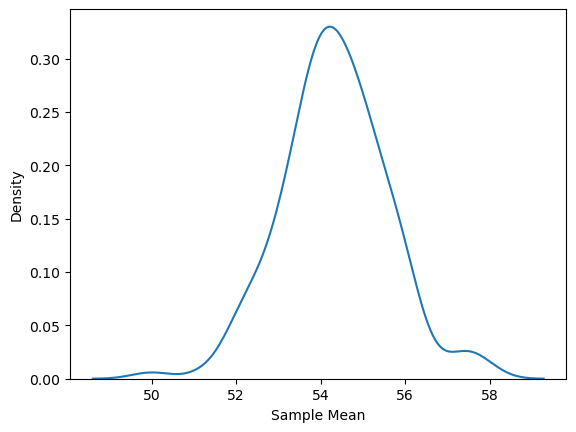

In [49]:
sns.kdeplot(x='Sample Mean',data=sample_mean)
plt.show()

# Hypothesis Testing

## z-test 

1. n > 30 
2. Even if the population distribution is not normally distributed the sample distribution will be normally distributed because of CLT. So the population mean will be equal to the sample mean and vice versa, but this doesn't stand true for STD.
3. If the STD is not present for the population distribution then we use a t-test

In [51]:
x_bar = 46.44
mu = 47
sigma = 6
n = 49

H_0 = "Manufacturer claims the average life span is 1200 hrs"
H_1 = "The average lifespan is not 1200 hrs"

z_value = (x_bar - mu) / (sigma / n**0.5)
print(z_value)

z_table = st.norm.ppf(0.01)
print(z_table)

if z_value < z_table:
    print("We reject the null hypothesis!")
else:
    print("We fail to reject the null hypothesis!")

print(f"The p-value is: {st.norm.cdf(z_value)}")

-0.653333333333336
-2.3263478740408408
We fail to reject the null hypothesis!
The p-value is: 0.2567707037112666


## t-test

1. Population mean (mu), Sample mean (x_bar), number of samples (n) < 30
2. t_test = x_bar - mu / (S/sqrt(n))
3. Degrees of freedom = (n-1)

In [53]:
## One sided/tailed t-test 

x_bar = 148
mu = 150
std = 5
n = 25

t_table = st.t.ppf(0.05,24)

t_value = (x_bar - mu) / (std / n**0.5)
t_value

if t_value < t_table:
    print("We reject the null hypothesis!")
else:
    print("We fail to reject the null hypothesis!")

We reject the null hypothesis!


In [54]:
## Two-sided/Independent t-test

x_bar_a = 80
x_bar_b = 75
std_a = 5
std_b = 6
n = 20

t_table = st.t.ppf(1-0.025,19)

t_value = (x_bar_a - x_bar_b) / ((std_a**2 / n) + (std_b**2 / n)) ** 0.5
t_value

if t_value > t_table:
    print("We reject the null hypothesis!")
else:
    print("We fail to reject the null hypothesis!")



We reject the null hypothesis!


## Chi-Square test

1. Goodness of data
2. Indepence of values in data
3. Homogenity 

$$ x^2 = \sum \frac {(O_i - E_i)^2} {E_i}$$

x^2 = chi squared
O_i = observed value
E_i = expected value

In [56]:
ob = np.array([22,17,20,26,22,13])
ex = np.array([20,20,20,20,20,20])

In [57]:
np.sum(np.square(ob-ex)/ex)

5.1000000000000005

Types of variables

1. Numerical
    1. Discrete (1,2,7,90) (int)
    2. Continuous (1,9,0.001,12.3) (float)
2. Categorical
    1. Ordinal (male/female, True/False) (object, binary)
    2. Nominal (size of t-shirt) (object)
3. Mixed

# Machine Learning Flow

1. EDA
2. Feature Engineering/Data cleaning
    1. Handling Missing Values
    2. Categorical Encodings (dummy vars)
    3. Handling Outliers
    4. Normalizing & Standardization
4. Feature Selection
5. Machine Learning Algorithm Selection
   1. Regression, Classification and Clustering
   2. Linear, Logistic, Decision Trees, Random Forest, KMeans
6. Hyper parameter Tuning
   1. Gridsearch, RandomisedSearch
7. Model Deployment
   1. Kubernetes, Docker

## Data Cleaning/EDA/Feature Engineering|

Data Cleaning is the process of preparing data for analysis/ML/DL by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted


In [178]:
df_movies = pd.read_csv("tmdb_5000_movies.csv")
df_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [142]:
## info() function shows all the not-null values and datatypes
df_movies.info()
## df_movies.notnull().sum() can be used to check 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [144]:
## Total non-null values in each row, column
df_movies.notnull().sum().sum()

92119

In [146]:
df_movies.shape

(4803, 20)

In [148]:
## isnull() function gives us a binary output for each value
## use sum() function twice, this will give us the total null values in the table/df
df_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [150]:
## Use this code to determine the percentage of null values for each column without the extra sum() or this which is the total percentage of null values
## shape[0], shape being an array of rows, columns
## According to the output the col "homepage" has more than 64% null values, this is definite drop. Usually more than 50% should be considered as a drop
print("Percentage of null values for each column:")
print((df_movies.isnull().sum()/df_movies.shape[0]) * 100)
print(f"Total percentage of null values in the dataframe: {(df_movies.isnull().sum().sum()/(df_movies.shape[0]*df_movies.shape[1])) * 100}")

Percentage of null values for each column:
budget                   0.000000
genres                   0.000000
homepage                64.355611
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.572351
title                    0.000000
vote_average             0.000000
vote_count               0.000000
dtype: float64
Total percentage of null values in the dataframe: 4.102644180720382


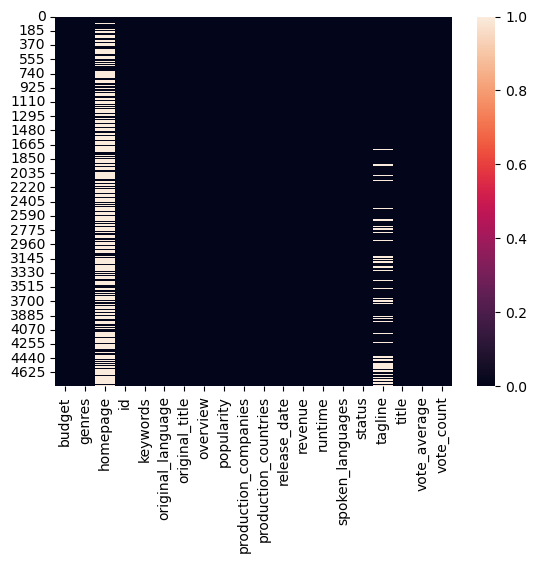

In [152]:
sns.heatmap(df_movies.isnull())
plt.show()

### Handling Mising Values

In [155]:
## inplace argument drops the column in the original df
df_movies.drop(columns=['homepage','tagline'],inplace=True)

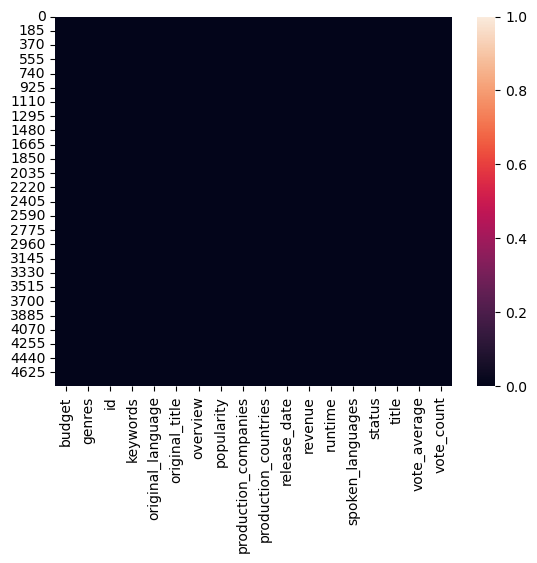

In [157]:
sns.heatmap(df_movies.isnull())
plt.show()

Now if we need those two columns that we just dropped, as they would be important for our model building, we can use this function below to remove the null values without losing the entire column

df_dropna(inplace=True)

#### Imputing Data with Mean, Median or Mode

For Categorical values Mode is used to fill missing values

In [533]:
df_titanic = sns.load_dataset("titanic")
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

One method includes using this function: df.fillna(10), but this is only valid if you know the values to replaces the N/A's with.

Forward/Backward Fill:

Forward/Backward fills, take the next/previous consecutive values after each NA and fill that NA will that value

In [351]:
# df.bfill()
# df.bfill() 
# df['age'].ffill()

Mean / Median / Mode fill

Use a loop to fill multiple columns of the same datatype to replace null values with Mean, Median or Mode

In [354]:
df_titanic.age.mode()[0]

24.0

In [356]:
# df_titanic.age.fillna(df_titanic.age.mode()[0], inplace=True)

In [358]:
# for i in df_titanic.select_dtypes(include='object').columns:
#    df_titanic.age.fillna(df_titanic.age.mode()[0], inplace=True)

#### Imputing Data with scikit-learn

In [361]:
df_titanic.select_dtypes(include='float64').columns

Index(['age', 'fare'], dtype='object')

In [363]:
from sklearn.impute import SimpleImputer

In [365]:
si = SimpleImputer(strategy="mean")
si.fit_transform(df_titanic[['age', 'fare']])

array([[22.        ,  7.25      ],
       [38.        , 71.2833    ],
       [26.        ,  7.925     ],
       ...,
       [29.69911765, 23.45      ],
       [26.        , 30.        ],
       [32.        ,  7.75      ]])

In [367]:
df_titanic.age.mean()

29.69911764705882

### Encoding & Dummy Variables

#### One Hot Encoding

One hot encoding can introduce the problem of multicollinearity because it creates multiple columns

In [381]:
# One hot encoding with pandas
pd.get_dummies(df_titanic['alive'])

,no,yes
0,True,False
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
886,True,False
887,False,True
888,True,False
889,False,True


In [400]:
# One hot encoding with scikit-learn
from sklearn.preprocessing import OneHotEncoder

In [467]:
# You can either make a new df and concat it to the existing with two new columns of dead and aline or just use
ohen = OneHotEncoder()
col = df_titanic[['alive']]
df_titanic['alive'] = ohen.fit_transform(df_titanic[['alive']]).toarray()
# pd.DataFrame(ar, columns=['Alive','Dead'])
df_titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,1.0,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,0.0,False


#### Label Encoding

On ordinal data

The rule to choose an encoder depends on the type of the categorical variable,

Nominal -> One hot encoder (no natural order) -> 

Is the column binary? ->

Yes -> Use a single column to avoid multicollinearity 

No -> Use different columns but still drop one to avoid multicollinearity
                                                                       
Ordinal -> Label Encoder (natural order) 


Label encoding can be used on both nominal and ordinal variables, it also doesn't cause the problem of multicollinearity

In [479]:
from sklearn.preprocessing import LabelEncoder

In [495]:
le = LabelEncoder()
df_titanic['class'] = le.fit_transform(df_titanic['class'])

In [497]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,2,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,0,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,2,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,0,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,2,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,0,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,2,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,0,man,True,C,Cherbourg,yes,True


Ordinal encoding can be mapped as well using the map() function

In [505]:
from sklearn.preprocessing import OrdinalEncoder

In [515]:
oe = OrdinalEncoder()
df_titanic['sex'] = oe.fit_transform(df_titanic[['sex']])

In [517]:
df_titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1.0,22.0,1,0,7.2500,S,2,man,True,NaN,Southampton,no,False
1,1,1,0.0,38.0,1,0,71.2833,C,0,woman,False,C,Cherbourg,yes,False


### Handling Outliers

In a box plot all the datapoints outside the whiskers are outliers. Outliers cause problems with model fitting, static calculations etc by creating a lot of noise in data. In ML because of outliers a lot of predictions can be wrong

High dependence of outliers in linear regression, mostly because of OLS; least dependence on Decision Trees 

#### Detecting Outliers

In [535]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


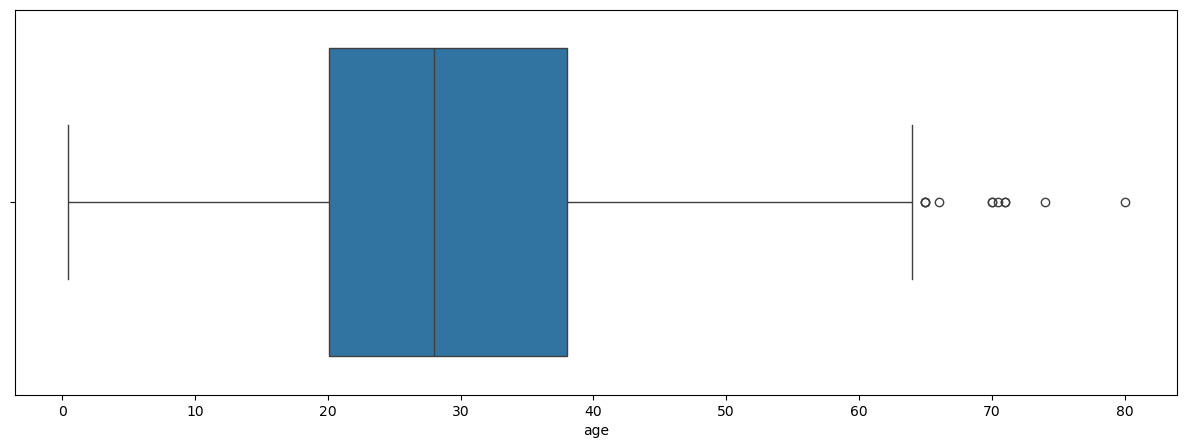

In [606]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df_titanic['age'])
plt.show()

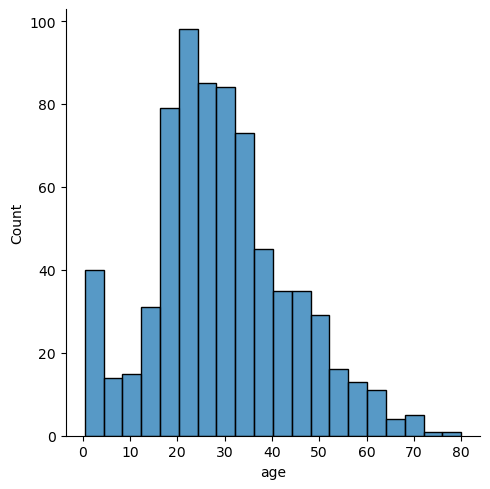

In [560]:
sns.displot(df_titanic['age'])
plt.show()

#### Removing Outliers

Using the IQR method to remove outliers from the data

$$ IQR = Q3 - Q1 $$

Minimum range: $$ Q_1 - 1.5 * IQR $$ 

Maximum range: $$ Q_3 + 1.5 * IQR $$ 

In [638]:
q1 = df_titanic.age.quantile(0.25)
q3 = df_titanic.age.quantile(0.75)
IQR = q3 - q1

In [612]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
min_range,max_range

# The outliers for the age column all lie above age 64.8125

(-26.724, 65.6344)

In [640]:
df_titanic[df_titanic['age'] < max_range]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Using the z-score

Most of the outliers lie beyond 3 std away from the median


$$ z = \frac {x - \mu} {\sigma} $$

In [655]:
min_range = df_titanic["fare"].mean() - (3 * df_titanic["fare"].std())
max_range = df_titanic["fare"].mean() + (3 * df_titanic["fare"].std())
min_range, max_range

(-116.87607782296807, 181.28449376011736)

In [674]:
z_score = (df_titanic["fare"] - df_titanic["fare"].mean()) / df_titanic['fare'].std()
# The z_score can be added as a column in the dataset and filtered for values less than 3

### Feature Scaling (Normalizing and Standardization)

When the values for one or more variables in a df are very large compared to other values in the df. In a ML model these features and values become dominant and the model is trained more those values. The smaller values become negligible, and their importance to the model become 0. To overcome this problem we use feature scaling, meaning we bring the larger and the small value to one similar level or scaled. 

The nature of the data remains the same even after feature scaling, for example if a dataset is normally distributed, it will still remain normally distributed even after feature scaling. But the magnitude of the data changes. There is also no effect of feature scaling on outliers apart from the reduction in its magnitude. 


$$ X_new = \frac {X_i - X_mean} {\text {Standard Deviation}} $$

Standardization: It is a very effective technique which re-sacles a feature value so that it has distribution with 0 mean value and variance equals to 1

In [695]:
df_peng = sns.load_dataset('penguins')
df_peng.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [708]:
df_peng.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [710]:
df_peng.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [714]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_peng['flipper_length_mm_ss'] = ss.fit_transform(df_peng[['flipper_length_mm']])
df_peng.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,flipper_length_mm_ss
count,342.000000,342.000000,342.000000,342.000000,3.420000e+02
mean,43.921930,17.151170,200.915205,4201.754386,-8.310441e-16
std,5.459584,1.974793,14.061714,801.954536,1.001465e+00
min,32.100000,13.100000,172.000000,2700.000000,-2.059320e+00
25%,39.225000,15.600000,190.000000,3550.000000,-7.773731e-01
50%,44.450000,17.300000,197.000000,4050.000000,-2.788381e-01
75%,48.500000,18.700000,213.000000,4750.000000,8.606705e-01
max,59.600000,21.500000,231.000000,6300.000000,2.142618e+00


Normalization